### Deliverable 1: Preprocessing the Data for a Neural Network

In [7]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [9]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

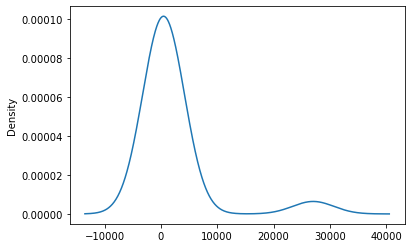

In [11]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

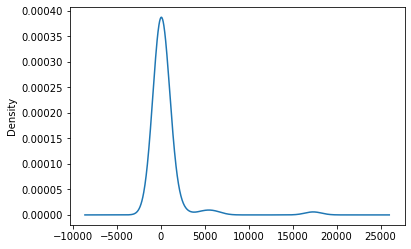

In [14]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [17]:
# Generate our categorical variable lists
application_df.dtypes
application_cat = ["APPLICATION_TYPE",
                    "AFFILIATION",            
                    "CLASSIFICATION",         
                    "USE_CASE",             
                    "ORGANIZATION",                               
                    "INCOME_AMT",          
                    "SPECIAL_CONSIDERATIONS"]

In [18]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\nanod\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [32]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 3:30 - loss: 209545.3750 - accuracy: 0.5312
Epoch 1: saving model to checkpoints\weights.01.hdf5
  8/804 [..............................] - ETA: 5s - loss: 28241.0215 - accuracy: 0.4961   
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 5s - loss: 15599.3633 - accuracy: 0.5104
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 5s - loss: 52592.3516 - accuracy: 0.5025
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 35/804 [>.............................] - ETA: 5s - loss: 43373.3281 - accuracy: 0.4955
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 45/804 [>.............................] - ETA: 4s - los

410/804 [==============>...............] - ETA: 2s - loss: 7694.0220 - accuracy: 0.4907
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 7544.1748 - accuracy: 0.4902
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 7778.1533 - accuracy: 0.4890
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 7850.9160 - accuracy: 0.4884
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 24298.5918 - accuracy: 0.4899
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
460/804 [===============

 16/804 [..............................] - ETA: 8s - loss: 20991.2090 - accuracy: 0.4297
Epoch 2: saving model to checkpoints\weights.02.hdf5
 21/804 [..............................] - ETA: 8s - loss: 25756.1367 - accuracy: 0.4613
Epoch 2: saving model to checkpoints\weights.02.hdf5
 28/804 [>.............................] - ETA: 7s - loss: 21334.3105 - accuracy: 0.4487
Epoch 2: saving model to checkpoints\weights.02.hdf5
 35/804 [>.............................] - ETA: 7s - loss: 18513.0664 - accuracy: 0.4420
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 41/804 [>.............................] - ETA: 7s - loss: 16435.3516 - accuracy: 0.4527
Epoch 2: saving model to checkpoints\weights.02.hdf5
 48/804 [>.............................] - ETA: 7s - loss: 15020.2734 - accuracy: 0.4499
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 56/804 [=>............................]

425/804 [==============>...............] - ETA: 2s - loss: 16748.1230 - accuracy: 0.4815
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 16618.7598 - accuracy: 0.4823
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 16259.4521 - accuracy: 0.4836
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 15913.6543 - accuracy: 0.4844
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
463/804 [================>.............] - ETA: 2s - loss: 15513.5098 - accuracy: 0.4858
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
471/804 [===========

 27/804 [>.............................] - ETA: 5s - loss: 11219.4561 - accuracy: 0.4942
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 9008.4814 - accuracy: 0.4789 
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 8219.8428 - accuracy: 0.4902
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 7232.8433 - accuracy: 0.4929
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 6431.7798 - accuracy: 0.4841
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 77/804 [=>............

440/804 [===============>..............] - ETA: 2s - loss: 31741.9883 - accuracy: 0.5156
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 31245.1211 - accuracy: 0.5156
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
457/804 [================>.............] - ETA: 2s - loss: 30564.9160 - accuracy: 0.5164
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
467/804 [================>.............] - ETA: 2s - loss: 29998.7539 - accuracy: 0.5161
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
477/804 [================>.............] - ETA: 1s - loss: 29371.1641 - accuracy: 0.5164
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
487/804 [===========

792/804 [============================>.] - ETA: 0s - loss: 54440.2070 - accuracy: 0.5132
Epoch 3: saving model to checkpoints\weights.03.hdf5
798/804 [============================>.] - ETA: 0s - loss: 54034.3047 - accuracy: 0.5135
Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 53642.0117 - accuracy: 0.5135
Epoch 4/100
  1/804 [..............................] - ETA: 3s - loss: 109.3961 - accuracy: 0.4375
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
  8/804 [..............................] - ETA: 7s - loss: 917.2617 - accuracy: 0.5156
Epoch 4: saving model to checkpoints\weights.04.hdf5
 13/804 [..............................] - ETA: 8s - loss: 1518.2053 - accuracy: 0.5240
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 23/804 [..............................] - ETA: 7s - loss: 865.9534 - accuracy: 0.

309/804 [==========>...................] - ETA: 5s - loss: 2075.4749 - accuracy: 0.5070
Epoch 4: saving model to checkpoints\weights.04.hdf5
313/804 [==========>...................] - ETA: 5s - loss: 2721.1951 - accuracy: 0.5066
Epoch 4: saving model to checkpoints\weights.04.hdf5
318/804 [==========>...................] - ETA: 4s - loss: 2684.3647 - accuracy: 0.5059
Epoch 4: saving model to checkpoints\weights.04.hdf5
323/804 [===========>..................] - ETA: 4s - loss: 2644.5415 - accuracy: 0.5061
Epoch 4: saving model to checkpoints\weights.04.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 2607.9653 - accuracy: 0.5053
Epoch 4: saving model to checkpoints\weights.04.hdf5
333/804 [===========>..................] - ETA: 4s - loss: 3619.0815 - accuracy: 0.5049
Epoch 4: saving model to checkpoints\weights.04.hdf5
338/804 [===========>..................] - ETA: 4s - loss: 3578.4290 - accuracy: 0.5040
Epoch 4: saving model to checkpoints\weights.04.hdf5
343/804 [====

615/804 [=====================>........] - ETA: 1s - loss: 28530.5820 - accuracy: 0.5044
Epoch 4: saving model to checkpoints\weights.04.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 28302.5332 - accuracy: 0.5041
Epoch 4: saving model to checkpoints\weights.04.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 28036.3965 - accuracy: 0.5035
Epoch 4: saving model to checkpoints\weights.04.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 27847.6270 - accuracy: 0.5033
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 27548.5801 - accuracy: 0.5030
Epoch 4: saving model to checkpoints\weights.04.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 27338.1367 - accuracy: 0.5029
Epoch 4: saving model to checkpoints\weights.04.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 27140.2285 - accuracy: 0.5030
Epoch

109/804 [===>..........................] - ETA: 9s - loss: 15713.2939 - accuracy: 0.4613
Epoch 5: saving model to checkpoints\weights.05.hdf5
114/804 [===>..........................] - ETA: 9s - loss: 15716.2861 - accuracy: 0.4605
Epoch 5: saving model to checkpoints\weights.05.hdf5
121/804 [===>..........................] - ETA: 8s - loss: 14897.2627 - accuracy: 0.4638
Epoch 5: saving model to checkpoints\weights.05.hdf5
127/804 [===>..........................] - ETA: 8s - loss: 14219.9893 - accuracy: 0.4638
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
134/804 [====>.........................] - ETA: 8s - loss: 13535.3936 - accuracy: 0.4629
Epoch 5: saving model to checkpoints\weights.05.hdf5
141/804 [====>.........................] - ETA: 8s - loss: 13044.6289 - accuracy: 0.4610
Epoch 5: saving model to checkpoints\weights.05.hdf5
146/804 [====>.........................] - ETA: 8s - loss: 13126.7168 - accuracy: 0.4613
Epoch

414/804 [==============>...............] - ETA: 4s - loss: 8793.0566 - accuracy: 0.4938
Epoch 5: saving model to checkpoints\weights.05.hdf5
419/804 [==============>...............] - ETA: 4s - loss: 8698.3809 - accuracy: 0.4932
Epoch 5: saving model to checkpoints\weights.05.hdf5
424/804 [==============>...............] - ETA: 4s - loss: 8607.7744 - accuracy: 0.4925
Epoch 5: saving model to checkpoints\weights.05.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 8512.7100 - accuracy: 0.4915
Epoch 5: saving model to checkpoints\weights.05.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 8593.2480 - accuracy: 0.4906
Epoch 5: saving model to checkpoints\weights.05.hdf5
439/804 [===============>..............] - ETA: 4s - loss: 8515.0186 - accuracy: 0.4900
Epoch 5: saving model to checkpoints\weights.05.hdf5
444/804 [===============>..............] - ETA: 4s - loss: 8456.7139 - accuracy: 0.4894
Epoch 5: saving model to checkpoints\weights.05.hdf5
449/804 [====

704/804 [=========================>....] - ETA: 1s - loss: 6475.1157 - accuracy: 0.4987
Epoch 5: saving model to checkpoints\weights.05.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 6430.4634 - accuracy: 0.4987
Epoch 5: saving model to checkpoints\weights.05.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 6389.2593 - accuracy: 0.4984
Epoch 5: saving model to checkpoints\weights.05.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 6351.9048 - accuracy: 0.4979
Epoch 5: saving model to checkpoints\weights.05.hdf5
724/804 [==========================>...] - ETA: 1s - loss: 6310.3750 - accuracy: 0.4978
Epoch 5: saving model to checkpoints\weights.05.hdf5
729/804 [==========================>...] - ETA: 1s - loss: 6270.7437 - accuracy: 0.4973
Epoch 5: saving model to checkpoints\weights.05.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 6228.8823 - accuracy: 0.4971
Epoch 5: saving model to checkpoints\weights.05.hdf5
739/804 [====

200/804 [======>.......................] - ETA: 6s - loss: 46709.5156 - accuracy: 0.4783
Epoch 6: saving model to checkpoints\weights.06.hdf5
205/804 [======>.......................] - ETA: 6s - loss: 45782.0547 - accuracy: 0.4797
Epoch 6: saving model to checkpoints\weights.06.hdf5
210/804 [======>.......................] - ETA: 6s - loss: 44702.3906 - accuracy: 0.4799
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
220/804 [=======>......................] - ETA: 6s - loss: 42708.4648 - accuracy: 0.4821
Epoch 6: saving model to checkpoints\weights.06.hdf5
228/804 [=======>......................] - ETA: 6s - loss: 41524.3477 - accuracy: 0.4846
Epoch 6: saving model to checkpoints\weights.06.hdf5
234/804 [=======>......................] - ETA: 5s - loss: 40521.8984 - accuracy: 0.4854
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
240/804 [=======>......................]

520/804 [==================>...........] - ETA: 2s - loss: 33456.9766 - accuracy: 0.5039
Epoch 6: saving model to checkpoints\weights.06.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 33153.9180 - accuracy: 0.5033
Epoch 6: saving model to checkpoints\weights.06.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 32848.7930 - accuracy: 0.5031
Epoch 6: saving model to checkpoints\weights.06.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 32574.9824 - accuracy: 0.5027
Epoch 6: saving model to checkpoints\weights.06.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 32296.1816 - accuracy: 0.5021
Epoch 6: saving model to checkpoints\weights.06.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 31962.2090 - accuracy: 0.5019
Epoch 6: saving model to checkpoints\weights.06.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 31845.4043 - accuracy: 0.5011
Epoch 6: saving model to checkpoints\weights.06.hdf5
555/80

 21/804 [..............................] - ETA: 10s - loss: 2394.2173 - accuracy: 0.4554
Epoch 7: saving model to checkpoints\weights.07.hdf5
 26/804 [..............................] - ETA: 10s - loss: 1965.4016 - accuracy: 0.4543
Epoch 7: saving model to checkpoints\weights.07.hdf5
 31/804 [>.............................] - ETA: 10s - loss: 6604.3647 - accuracy: 0.4536
Epoch 7: saving model to checkpoints\weights.07.hdf5
 36/804 [>.............................] - ETA: 10s - loss: 6030.5381 - accuracy: 0.4557
Epoch 7: saving model to checkpoints\weights.07.hdf5
 41/804 [>.............................] - ETA: 10s - loss: 5337.0601 - accuracy: 0.4619
Epoch 7: saving model to checkpoints\weights.07.hdf5
 46/804 [>.............................] - ETA: 10s - loss: 4783.4048 - accuracy: 0.4674
Epoch 7: saving model to checkpoints\weights.07.hdf5
 51/804 [>.............................] - ETA: 10s - loss: 5030.2412 - accuracy: 0.4638
Epoch 7: saving model to checkpoints\weights.07.hdf5
 56/80

311/804 [==========>...................] - ETA: 6s - loss: 1742.7289 - accuracy: 0.5073
Epoch 7: saving model to checkpoints\weights.07.hdf5
316/804 [==========>...................] - ETA: 6s - loss: 1720.7759 - accuracy: 0.5067
Epoch 7: saving model to checkpoints\weights.07.hdf5
321/804 [==========>...................] - ETA: 6s - loss: 1712.8973 - accuracy: 0.5065
Epoch 7: saving model to checkpoints\weights.07.hdf5
326/804 [===========>..................] - ETA: 6s - loss: 1965.9645 - accuracy: 0.5067
Epoch 7: saving model to checkpoints\weights.07.hdf5
331/804 [===========>..................] - ETA: 6s - loss: 1976.0535 - accuracy: 0.5070
Epoch 7: saving model to checkpoints\weights.07.hdf5
336/804 [===========>..................] - ETA: 6s - loss: 1950.1638 - accuracy: 0.5090
Epoch 7: saving model to checkpoints\weights.07.hdf5
341/804 [===========>..................] - ETA: 6s - loss: 1947.8209 - accuracy: 0.5093
Epoch 7: saving model to checkpoints\weights.07.hdf5
346/804 [====

601/804 [=====================>........] - ETA: 3s - loss: 6391.4565 - accuracy: 0.5125
Epoch 7: saving model to checkpoints\weights.07.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 6359.7734 - accuracy: 0.5118
Epoch 7: saving model to checkpoints\weights.07.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 6325.2031 - accuracy: 0.5115
Epoch 7: saving model to checkpoints\weights.07.hdf5
616/804 [=====================>........] - ETA: 2s - loss: 6313.8843 - accuracy: 0.5109
Epoch 7: saving model to checkpoints\weights.07.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 6285.3003 - accuracy: 0.5104
Epoch 7: saving model to checkpoints\weights.07.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 6247.5410 - accuracy: 0.5101
Epoch 7: saving model to checkpoints\weights.07.hdf5
631/804 [======================>.......] - ETA: 2s - loss: 6204.7539 - accuracy: 0.5097
Epoch 7: saving model to checkpoints\weights.07.hdf5
636/804 [====

 97/804 [==>...........................] - ETA: 9s - loss: 243.9434 - accuracy: 0.5383
Epoch 8: saving model to checkpoints\weights.08.hdf5
102/804 [==>...........................] - ETA: 9s - loss: 235.1356 - accuracy: 0.5389
Epoch 8: saving model to checkpoints\weights.08.hdf5
107/804 [==>...........................] - ETA: 9s - loss: 227.4925 - accuracy: 0.5388
Epoch 8: saving model to checkpoints\weights.08.hdf5
112/804 [===>..........................] - ETA: 9s - loss: 228.6221 - accuracy: 0.5352
Epoch 8: saving model to checkpoints\weights.08.hdf5
117/804 [===>..........................] - ETA: 9s - loss: 324.9489 - accuracy: 0.5342
Epoch 8: saving model to checkpoints\weights.08.hdf5
122/804 [===>..........................] - ETA: 9s - loss: 312.6670 - accuracy: 0.5359
Epoch 8: saving model to checkpoints\weights.08.hdf5
127/804 [===>..........................] - ETA: 8s - loss: 301.7494 - accuracy: 0.5349
Epoch 8: saving model to checkpoints\weights.08.hdf5
132/804 [===>.......

387/804 [=============>................] - ETA: 5s - loss: 1206.7811 - accuracy: 0.5208
Epoch 8: saving model to checkpoints\weights.08.hdf5
392/804 [=============>................] - ETA: 5s - loss: 1191.4329 - accuracy: 0.5208
Epoch 8: saving model to checkpoints\weights.08.hdf5
397/804 [=============>................] - ETA: 5s - loss: 1176.4548 - accuracy: 0.5206
Epoch 8: saving model to checkpoints\weights.08.hdf5
402/804 [==============>...............] - ETA: 5s - loss: 1161.8772 - accuracy: 0.5202
Epoch 8: saving model to checkpoints\weights.08.hdf5
407/804 [==============>...............] - ETA: 5s - loss: 1147.6315 - accuracy: 0.5201
Epoch 8: saving model to checkpoints\weights.08.hdf5
412/804 [==============>...............] - ETA: 5s - loss: 1133.7786 - accuracy: 0.5195
Epoch 8: saving model to checkpoints\weights.08.hdf5
418/804 [==============>...............] - ETA: 4s - loss: 1125.1488 - accuracy: 0.5198
Epoch 8: saving model to checkpoints\weights.08.hdf5
422/804 [====

757/804 [===========================>..] - ETA: 0s - loss: 6370.3223 - accuracy: 0.5109
Epoch 8: saving model to checkpoints\weights.08.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 6366.1548 - accuracy: 0.5107
Epoch 8: saving model to checkpoints\weights.08.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 6361.9985 - accuracy: 0.5104
Epoch 8: saving model to checkpoints\weights.08.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 6322.1680 - accuracy: 0.5103
Epoch 8: saving model to checkpoints\weights.08.hdf5
778/804 [============================>.] - ETA: 0s - loss: 6275.5840 - accuracy: 0.5100
Epoch 8: saving model to checkpoints\weights.08.hdf5
783/804 [============================>.] - ETA: 0s - loss: 6236.5005 - accuracy: 0.5097
Epoch 8: saving model to checkpoints\weights.08.hdf5
787/804 [============================>.] - ETA: 0s - loss: 6205.7529 - accuracy: 0.5096
Epoch 8: saving model to checkpoints\weights.08.hdf5
793/804 [====


Epoch 9: saving model to checkpoints\weights.09.hdf5
348/804 [===========>..................] - ETA: 3s - loss: 30822.3457 - accuracy: 0.4841
Epoch 9: saving model to checkpoints\weights.09.hdf5
357/804 [============>.................] - ETA: 3s - loss: 30083.0469 - accuracy: 0.4847
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
363/804 [============>.................] - ETA: 3s - loss: 29655.2637 - accuracy: 0.4860
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
373/804 [============>.................] - ETA: 3s - loss: 28936.4082 - accuracy: 0.4863
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
383/804 [=============>................] - ETA: 3s - loss: 28538.2773 - accuracy: 0.4862
Epoch 9: saving model to checkpoints\weights.09.hdf5
392/804 [=============>................] - ETA: 3s - loss: 30715.6973 - ac

738/804 [==========================>...] - ETA: 0s - loss: 22795.7344 - accuracy: 0.5003
Epoch 9: saving model to checkpoints\weights.09.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 22738.2559 - accuracy: 0.5005
Epoch 9: saving model to checkpoints\weights.09.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 22600.5059 - accuracy: 0.5001
Epoch 9: saving model to checkpoints\weights.09.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 22450.8418 - accuracy: 0.5001
Epoch 9: saving model to checkpoints\weights.09.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 22306.3848 - accuracy: 0.5003
Epoch 9: saving model to checkpoints\weights.09.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 22165.3086 - accuracy: 0.5007
Epoch 9: saving model to checkpoints\weights.09.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 22021.2402 - accuracy: 0.5011
Epoch 9: saving model to checkpoints\weights.09.hdf5
773/80

259/804 [========>.....................] - ETA: 5s - loss: 1409.3308 - accuracy: 0.5321
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
269/804 [=========>....................] - ETA: 5s - loss: 1384.1370 - accuracy: 0.5300
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
279/804 [=========>....................] - ETA: 5s - loss: 1343.8983 - accuracy: 0.5265
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 1314.8748 - accuracy: 0.5244
Epoch 10: saving model to checkpoints\weights.10.hdf5
297/804 [==========>...................] - ETA: 4s - loss: 1344.3848 - accuracy: 0.5237
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
304/804 [==========>...................] - ETA: 4s - loss: 1437.9871 -

641/804 [======================>.......] - ETA: 1s - loss: 26855.3984 - accuracy: 0.5254
Epoch 10: saving model to checkpoints\weights.10.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 26614.3887 - accuracy: 0.5258
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 26420.3555 - accuracy: 0.5259
Epoch 10: saving model to checkpoints\weights.10.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 26162.6270 - accuracy: 0.5257
Epoch 10: saving model to checkpoints\weights.10.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 25933.3555 - accuracy: 0.5260
Epoch 10: saving model to checkpoints\weights.10.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 25716.6680 - accuracy: 0.5263
Epoch 10: saving model to checkpoints\weights.10.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 25527.6895 - accuracy: 0.527

166/804 [=====>........................] - ETA: 5s - loss: 7581.1763 - accuracy: 0.4708
Epoch 11: saving model to checkpoints\weights.11.hdf5
171/804 [=====>........................] - ETA: 5s - loss: 7464.0752 - accuracy: 0.4711
Epoch 11: saving model to checkpoints\weights.11.hdf5
177/804 [=====>........................] - ETA: 5s - loss: 8110.8857 - accuracy: 0.4700
Epoch 11: saving model to checkpoints\weights.11.hdf5
184/804 [=====>........................] - ETA: 5s - loss: 7874.9683 - accuracy: 0.4696
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 7755.4370 - accuracy: 0.4689
Epoch 11: saving model to checkpoints\weights.11.hdf5
195/804 [======>.......................] - ETA: 5s - loss: 7571.7495 - accuracy: 0.4697
Epoch 11: saving model to checkpoints\weights.11.hdf5
202/804 [======>.......................] - ETA: 5s - loss: 7326.7339 - accuracy: 0.4697
Epoch

502/804 [=================>............] - ETA: 2s - loss: 4340.8413 - accuracy: 0.4873
Epoch 11: saving model to checkpoints\weights.11.hdf5
508/804 [=================>............] - ETA: 2s - loss: 6093.8838 - accuracy: 0.4875
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 6594.1802 - accuracy: 0.4880
Epoch 11: saving model to checkpoints\weights.11.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 6700.9624 - accuracy: 0.4880
Epoch 11: saving model to checkpoints\weights.11.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 7138.0474 - accuracy: 0.4892
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 7096.5542 - accuracy: 0.4905
Epoch 11: saving model to checkpoints\weights.11.hdf5
544/804 [===================>.........

 71/804 [=>............................] - ETA: 5s - loss: 661.4773 - accuracy: 0.5612
Epoch 12: saving model to checkpoints\weights.12.hdf5
 78/804 [=>............................] - ETA: 5s - loss: 886.9494 - accuracy: 0.5565
Epoch 12: saving model to checkpoints\weights.12.hdf5
 85/804 [==>...........................] - ETA: 5s - loss: 1323.4442 - accuracy: 0.5526
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 91/804 [==>...........................] - ETA: 5s - loss: 1389.8762 - accuracy: 0.5532
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
101/804 [==>...........................] - ETA: 5s - loss: 3006.8035 - accuracy: 0.5421
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
111/804 [===>..........................] - ETA: 5s - loss: 6052.3472 - accuracy: 0.5355
Epoch 12: saving model to checkpoints\w

445/804 [===============>..............] - ETA: 2s - loss: 9106.8779 - accuracy: 0.5145
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 9062.4307 - accuracy: 0.5148
Epoch 12: saving model to checkpoints\weights.12.hdf5
456/804 [================>.............] - ETA: 2s - loss: 8965.6152 - accuracy: 0.5151
Epoch 12: saving model to checkpoints\weights.12.hdf5
461/804 [================>.............] - ETA: 2s - loss: 8869.4180 - accuracy: 0.5157
Epoch 12: saving model to checkpoints\weights.12.hdf5
468/804 [================>.............] - ETA: 2s - loss: 8742.5908 - accuracy: 0.5161
Epoch 12: saving model to checkpoints\weights.12.hdf5
472/804 [================>.............] - ETA: 2s - loss: 8678.4453 - accuracy: 0.5165
Epoch 12: saving model to checkpoints\weights.12.hdf5
479/804 [================>.............] - ETA: 2s - loss: 8557.5176 - accuracy: 0.5169
Epoch

  1/804 [..............................] - ETA: 2s - loss: 828.0590 - accuracy: 0.2812
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
  7/804 [..............................] - ETA: 8s - loss: 232.6800 - accuracy: 0.3661
Epoch 13: saving model to checkpoints\weights.13.hdf5
 14/804 [..............................] - ETA: 6s - loss: 4980.4155 - accuracy: 0.4397
Epoch 13: saving model to checkpoints\weights.13.hdf5
 20/804 [..............................] - ETA: 6s - loss: 3709.7375 - accuracy: 0.4641
Epoch 13: saving model to checkpoints\weights.13.hdf5
 25/804 [..............................] - ETA: 6s - loss: 3019.3503 - accuracy: 0.4625
Epoch 13: saving model to checkpoints\weights.13.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 2550.2178 - accuracy: 0.4708
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 37/804 [>.............................]

294/804 [=========>....................] - ETA: 6s - loss: 1828.7823 - accuracy: 0.5204
Epoch 13: saving model to checkpoints\weights.13.hdf5
299/804 [==========>...................] - ETA: 5s - loss: 1801.0786 - accuracy: 0.5209
Epoch 13: saving model to checkpoints\weights.13.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 1812.1641 - accuracy: 0.5193
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
312/804 [==========>...................] - ETA: 5s - loss: 1796.5013 - accuracy: 0.5189
Epoch 13: saving model to checkpoints\weights.13.hdf5
319/804 [==========>...................] - ETA: 5s - loss: 1759.7620 - accuracy: 0.5183
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
327/804 [===========>..................] - ETA: 5s - loss: 1993.7817 - accuracy: 0.5183
Epoch 13: saving model to checkpoints\weights.13.hdf5
335/804 [===========>.................


Epoch 13: saving model to checkpoints\weights.13.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 5034.1084 - accuracy: 0.5019
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 4961.8037 - accuracy: 0.5017
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 4892.8804 - accuracy: 0.5021
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 4824.5654 - accuracy: 0.5021
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 4772.7671 - accuracy: 0.5022
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: savi


Epoch 14: saving model to checkpoints\weights.14.hdf5
238/804 [=======>......................] - ETA: 5s - loss: 540.2347 - accuracy: 0.5344
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
248/804 [========>.....................] - ETA: 4s - loss: 519.0552 - accuracy: 0.5350
Epoch 14: saving model to checkpoints\weights.14.hdf5
255/804 [========>.....................] - ETA: 4s - loss: 504.9260 - accuracy: 0.5359
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
263/804 [========>.....................] - ETA: 4s - loss: 489.8178 - accuracy: 0.5342
Epoch 14: saving model to checkpoints\weights.14.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 474.3333 - accuracy: 0.5342
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
278/804 [=========>....................] - ETA: 4s - loss: 464.7990 - accur

574/804 [====================>.........] - ETA: 2s - loss: 846.6419 - accuracy: 0.5306
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 834.5963 - accuracy: 0.5306
Epoch 14: saving model to checkpoints\weights.14.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 823.4984 - accuracy: 0.5304
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 813.9155 - accuracy: 0.5302
Epoch 14: saving model to checkpoints\weights.14.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 804.5567 - accuracy: 0.5302
Epoch 14: saving model to checkpoints\weights.14.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 798.0195 - accuracy: 0.5305
Epoch 14: saving model to checkpoints\weights.14.hdf5
617/804 [======================>.......] - E

108/804 [===>..........................] - ETA: 6s - loss: 740.6097 - accuracy: 0.5515
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
114/804 [===>..........................] - ETA: 6s - loss: 803.2573 - accuracy: 0.5513
Epoch 15: saving model to checkpoints\weights.15.hdf5
123/804 [===>..........................] - ETA: 5s - loss: 746.6669 - accuracy: 0.5503
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
129/804 [===>..........................] - ETA: 5s - loss: 712.8416 - accuracy: 0.5555
Epoch 15: saving model to checkpoints\weights.15.hdf5
138/804 [====>.........................] - ETA: 5s - loss: 687.2504 - accuracy: 0.5550
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
144/804 [====>.........................] - ETA: 5s - loss: 659.0756 - accuracy: 0.5530
Epoch 15: saving model to checkpoints\weigh

414/804 [==============>...............] - ETA: 3s - loss: 2023.4591 - accuracy: 0.5217
Epoch 15: saving model to checkpoints\weights.15.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 2005.6715 - accuracy: 0.5236
Epoch 15: saving model to checkpoints\weights.15.hdf5
424/804 [==============>...............] - ETA: 3s - loss: 1982.3167 - accuracy: 0.5255
Epoch 15: saving model to checkpoints\weights.15.hdf5
429/804 [===============>..............] - ETA: 3s - loss: 1959.3284 - accuracy: 0.5256
Epoch 15: saving model to checkpoints\weights.15.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 1936.8724 - accuracy: 0.5251
Epoch 15: saving model to checkpoints\weights.15.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 1910.6970 - accuracy: 0.5256
Epoch 15: saving model to checkpoints\weights.15.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 1893.5422 - accuracy: 0.5255
Epoch 15: saving model to checkpoints\weights.15.hdf5
449/80

804/804 [==============================] - 7s 8ms/step - loss: 1407.9086 - accuracy: 0.5104
Epoch 16/100
  1/804 [..............................] - ETA: 2s - loss: 4.1144 - accuracy: 0.6875
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 12/804 [..............................] - ETA: 3s - loss: 1017.4853 - accuracy: 0.5208
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 20/804 [..............................] - ETA: 4s - loss: 681.4465 - accuracy: 0.5188 
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 5322.5806 - accuracy: 0.5146
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 4273.3779 - accuracy: 0.5141
Epoch 16: saving model

410/804 [==============>...............] - ETA: 2s - loss: 6120.9404 - accuracy: 0.4704
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 5930.0659 - accuracy: 0.4710
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 6127.7207 - accuracy: 0.4719
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 5927.5396 - accuracy: 0.4728
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
461/804 [================>.............] - ETA: 1s - loss: 5814.4331 - accuracy: 0.4738
Epoch 16: savi

 21/804 [..............................] - ETA: 4s - loss: 58.8732 - accuracy: 0.5223
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 127.6610 - accuracy: 0.5141
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 100.9678 - accuracy: 0.4970
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 98.0616 - accuracy: 0.4994 
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
 64/804 [=>............................] - ETA: 4s - loss: 100.3779 - accuracy: 0.5015
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
 74/804 [=>..........


Epoch 17: saving model to checkpoints\weights.17.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 1259.8025 - accuracy: 0.4935
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
461/804 [================>.............] - ETA: 1s - loss: 1235.3540 - accuracy: 0.4948
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
471/804 [================>.............] - ETA: 1s - loss: 1214.2649 - accuracy: 0.4960
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
481/804 [================>.............] - ETA: 1s - loss: 1194.3192 - accuracy: 0.4963
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
491/804 [=================>............] - ETA: 1s - loss: 1170.9750 - accuracy: 0.4967
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: savi

 67/804 [=>............................] - ETA: 4s - loss: 390.7271 - accuracy: 0.5140
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 408.8845 - accuracy: 0.5146
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 376.5253 - accuracy: 0.5151
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 363.1736 - accuracy: 0.5209
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 355.4600 - accuracy: 0.5190
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
117/804 [===>.......

499/804 [=================>............] - ETA: 1s - loss: 726.9373 - accuracy: 0.5157
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
509/804 [=================>............] - ETA: 1s - loss: 712.7004 - accuracy: 0.5160
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 701.7540 - accuracy: 0.5163
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 712.1264 - accuracy: 0.5158
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 701.6790 - accuracy: 0.5158
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
550/804 [===========

118/804 [===>..........................] - ETA: 3s - loss: 339.5959 - accuracy: 0.5466
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 323.2923 - accuracy: 0.5447
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 300.9049 - accuracy: 0.5433
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 299.7470 - accuracy: 0.5433
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 285.1104 - accuracy: 0.5423
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
168/804 [=====>.....

558/804 [===================>..........] - ETA: 1s - loss: 1017.7181 - accuracy: 0.5134
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 1000.6917 - accuracy: 0.5131
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 986.3455 - accuracy: 0.5134 
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 964.7409 - accuracy: 0.5145
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 953.5060 - accuracy: 0.5143
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
608/804 [========


Epoch 20: saving model to checkpoints\weights.20.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.8563 - accuracy: 0.5368
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.8513 - accuracy: 0.5385
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 0.8522 - accuracy: 0.5360
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.8517 - accuracy: 0.5346
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 

604/804 [=====================>........] - ETA: 1s - loss: 0.7964 - accuracy: 0.5329
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.7953 - accuracy: 0.5329
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.7941 - accuracy: 0.5331
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.7924 - accuracy: 0.5332
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.7918 - accuracy: 0.5326
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to che


Epoch 21: saving model to checkpoints\weights.21.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.7066 - accuracy: 0.5314
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.7059 - accuracy: 0.5322
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.7061 - accuracy: 0.5311
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.7059 - accuracy: 0.5312
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.7059 - accuracy: 0.5306
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to che


Epoch 21: saving model to checkpoints\weights.21.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6943 - accuracy: 0.5362
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6940 - accuracy: 0.5361
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6941 - accuracy: 0.5356
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6939 - accuracy: 0.5352
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6936 - accuracy: 0.5351
Epoch 21: saving model to che


Epoch 22: saving model to checkpoints\weights.22.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.6723 - accuracy: 0.5379
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.6715 - accuracy: 0.5398
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 0.6709 - accuracy: 0.5411
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.6712 - accuracy: 0.5407
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.6707 - accuracy: 0.5418
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to che


Epoch 22: saving model to checkpoints\weights.22.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6675 - accuracy: 0.5326
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6675 - accuracy: 0.5322
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6673 - accuracy: 0.5325
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6671 - accuracy: 0.5330
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6670 - accuracy: 0.5327
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to che

337/804 [===========>..................] - ETA: 2s - loss: 0.6581 - accuracy: 0.5618
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.6577 - accuracy: 0.5639
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.6573 - accuracy: 0.5674
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6570 - accuracy: 0.5696
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
382/804 [=============>................] - ETA: 2s - loss: 0.6570 - accuracy: 0.5715
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to che


Epoch 23: saving model to checkpoints\weights.23.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6557 - accuracy: 0.5979
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6556 - accuracy: 0.5979
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6555 - accuracy: 0.5986
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6553 - accuracy: 0.5991
Epoch 23: saving model to checkpoints\weights.23.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6554 - accuracy: 0.5993
Epoch 24/100
  1/804 [..............................] - ETA: 2s - loss: 0.6564 - accuracy: 0.5938
Epoch 24: saving model to checkpoints

386/804 [=============>................] - ETA: 2s - loss: 0.6496 - accuracy: 0.6444
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.6492 - accuracy: 0.6457
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.6492 - accuracy: 0.6456
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6488 - accuracy: 0.6460
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.6486 - accuracy: 0.6459
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to che

  1/804 [..............................] - ETA: 1s - loss: 0.6722 - accuracy: 0.6250
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 14/804 [..............................] - ETA: 4s - loss: 0.6500 - accuracy: 0.6607
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.6410 - accuracy: 0.6478
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 34/804 [>.............................] - ETA: 4s - loss: 0.6386 - accuracy: 0.6471
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 44/804 [>.............................] - ETA: 4s - loss: 0.6416 - accuracy: 0.6548
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to che

424/804 [==============>...............] - ETA: 2s - loss: 0.6470 - accuracy: 0.6479
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.6467 - accuracy: 0.6489
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.6464 - accuracy: 0.6502
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6461 - accuracy: 0.6504
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6463 - accuracy: 0.6494
Epoch 25: saving model to checkpoints\weights.25.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6460 - accuracy: 0.6500


 30/804 [>.............................] - ETA: 4s - loss: 0.6310 - accuracy: 0.6781
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.6352 - accuracy: 0.6664
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.6376 - accuracy: 0.6669
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.6384 - accuracy: 0.6646
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.6382 - accuracy: 0.6634
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 80/804 [=>...................

450/804 [===============>..............] - ETA: 2s - loss: 0.6397 - accuracy: 0.6562
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.6395 - accuracy: 0.6567
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6393 - accuracy: 0.6568
Epoch 26: saving model to checkpoints\weights.26.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6394 - accuracy: 0.6566
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.6395 - accuracy: 0.6565
Epoch 26: saving model to checkpoints\weights.26.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.6393 - accuracy: 0.6572
Epoch 26: saving model to checkpoints\weights.26.hdf5




Epoch 27: saving model to checkpoints\weights.27.hdf5
 61/804 [=>............................] - ETA: 5s - loss: 0.6353 - accuracy: 0.6675
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.6344 - accuracy: 0.6686
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.6365 - accuracy: 0.6617
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.6352 - accuracy: 0.6628
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.6360 - accuracy: 0.6600
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to che

406/804 [==============>...............] - ETA: 3s - loss: 0.6284 - accuracy: 0.6734
Epoch 27: saving model to checkpoints\weights.27.hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.6278 - accuracy: 0.6740
Epoch 27: saving model to checkpoints\weights.27.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6279 - accuracy: 0.6740
Epoch 27: saving model to checkpoints\weights.27.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 0.6280 - accuracy: 0.6732
Epoch 27: saving model to checkpoints\weights.27.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6280 - accuracy: 0.6730
Epoch 27: saving model to checkpoints\weights.27.hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6285 - accuracy: 0.6722
Epoch 27: saving model to checkpoints\weights.27.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6286 - accuracy: 0.6722
Epoch 27: saving model to checkpoints\weights.27.hdf5
441/804 [===============>..

701/804 [=========================>....] - ETA: 1s - loss: 0.6281 - accuracy: 0.6760
Epoch 27: saving model to checkpoints\weights.27.hdf5
706/804 [=========================>....] - ETA: 1s - loss: 0.6280 - accuracy: 0.6764
Epoch 27: saving model to checkpoints\weights.27.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6279 - accuracy: 0.6765
Epoch 27: saving model to checkpoints\weights.27.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6279 - accuracy: 0.6764
Epoch 27: saving model to checkpoints\weights.27.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6281 - accuracy: 0.6761
Epoch 27: saving model to checkpoints\weights.27.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6280 - accuracy: 0.6765
Epoch 27: saving model to checkpoints\weights.27.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6299 - accuracy: 0.6763
Epoch 27: saving model to checkpoints\weights.27.hdf5
736/804 [==================

192/804 [======>.......................] - ETA: 7s - loss: 0.6878 - accuracy: 0.5109
Epoch 28: saving model to checkpoints\weights.28.hdf5
197/804 [======>.......................] - ETA: 7s - loss: 0.6876 - accuracy: 0.5127
Epoch 28: saving model to checkpoints\weights.28.hdf5
202/804 [======>.......................] - ETA: 7s - loss: 0.6872 - accuracy: 0.5142
Epoch 28: saving model to checkpoints\weights.28.hdf5
207/804 [======>.......................] - ETA: 7s - loss: 0.6868 - accuracy: 0.5151
Epoch 28: saving model to checkpoints\weights.28.hdf5
212/804 [======>.......................] - ETA: 7s - loss: 0.6867 - accuracy: 0.5152
Epoch 28: saving model to checkpoints\weights.28.hdf5
217/804 [=======>......................] - ETA: 7s - loss: 0.6864 - accuracy: 0.5154
Epoch 28: saving model to checkpoints\weights.28.hdf5
222/804 [=======>......................] - ETA: 6s - loss: 0.6860 - accuracy: 0.5152
Epoch 28: saving model to checkpoints\weights.28.hdf5
227/804 [=======>..........

507/804 [=================>............] - ETA: 3s - loss: 0.6662 - accuracy: 0.5652
Epoch 28: saving model to checkpoints\weights.28.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.6660 - accuracy: 0.5662
Epoch 28: saving model to checkpoints\weights.28.hdf5
519/804 [==================>...........] - ETA: 3s - loss: 0.6656 - accuracy: 0.5674
Epoch 28: saving model to checkpoints\weights.28.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.6654 - accuracy: 0.5678
Epoch 28: saving model to checkpoints\weights.28.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.6652 - accuracy: 0.5685
Epoch 28: saving model to checkpoints\weights.28.hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6651 - accuracy: 0.5690
Epoch 28: saving model to checkpoints\weights.28.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6648 - accuracy: 0.5701
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to 

 42/804 [>.............................] - ETA: 5s - loss: 0.6254 - accuracy: 0.6726
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 48/804 [>.............................] - ETA: 6s - loss: 0.6294 - accuracy: 0.6706
Epoch 29: saving model to checkpoints\weights.29.hdf5
 56/804 [=>............................] - ETA: 6s - loss: 0.6282 - accuracy: 0.6758
Epoch 29: saving model to checkpoints\weights.29.hdf5
 62/804 [=>............................] - ETA: 6s - loss: 0.6268 - accuracy: 0.6764
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 68/804 [=>............................] - ETA: 6s - loss: 0.6255 - accuracy: 0.6783
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6237 - accuracy: 0.6815
Epoch 29: saving model to checkpoints\weights.29.hdf5
 


Epoch 29: saving model to checkpoints\weights.29.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6300 - accuracy: 0.6686
Epoch 29: saving model to checkpoints\weights.29.hdf5
442/804 [===============>..............] - ETA: 2s - loss: 0.6303 - accuracy: 0.6682
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6300 - accuracy: 0.6686
Epoch 29: saving model to checkpoints\weights.29.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6297 - accuracy: 0.6688
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6302 - accuracy: 0.6681
Epoch 29: saving model to checkpoints\weights.29.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6297 - accuracy: 0.6691
Epoch 29: saving model to checkpoints\weights.29.hdf5
4

798/804 [============================>.] - ETA: 0s - loss: 0.6326 - accuracy: 0.6686
Epoch 29: saving model to checkpoints\weights.29.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6332 - accuracy: 0.6674
Epoch 30/100
  1/804 [..............................] - ETA: 4s - loss: 0.6502 - accuracy: 0.6562
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
  9/804 [..............................] - ETA: 6s - loss: 0.7171 - accuracy: 0.4896
Epoch 30: saving model to checkpoints\weights.30.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.7251 - accuracy: 0.4669
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 24/804 [..............................] - ETA: 6s - loss: 0.7271 - accuracy: 0.4596
Epoch 30: saving model to checkpoints\weights.30.hdf5
 33/804 [>.............................] - ETA: 5s - loss: 0.7311 - accuracy: 0.4451
Epoch 30

389/804 [=============>................] - ETA: 3s - loss: 0.7033 - accuracy: 0.4663
Epoch 30: saving model to checkpoints\weights.30.hdf5
398/804 [=============>................] - ETA: 3s - loss: 0.7031 - accuracy: 0.4658
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.7029 - accuracy: 0.4664
Epoch 30: saving model to checkpoints\weights.30.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.7028 - accuracy: 0.4673
Epoch 30: saving model to checkpoints\weights.30.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.7027 - accuracy: 0.4676
Epoch 30: saving model to checkpoints\weights.30.hdf5
423/804 [==============>...............] - ETA: 2s - loss: 0.7025 - accuracy: 0.4685
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
429/804 [===============>..............] - ETA: 2s - los

718/804 [=========================>....] - ETA: 0s - loss: 0.6982 - accuracy: 0.4934
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6982 - accuracy: 0.4942
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6980 - accuracy: 0.4951
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6979 - accuracy: 0.4957
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6978 - accuracy: 0.4964
Epoch 30: saving model to checkpoints\weights.30.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6977 - accuracy: 0.4969



Epoch 31: saving model to checkpoints\weights.31.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5331
Epoch 31: saving model to checkpoints\weights.31.hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5320
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 31: saving model to checkpoints\weights.31.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 31: saving model to checkpoints\weights.31.hdf5
323/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 31: saving model to checkpoints\weights.31.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
3


Epoch 31: saving model to checkpoints\weights.31.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 31: saving model to checkpoints\weights.31.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
720/804 [=====================

251/804 [========>.....................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5362
Epoch 32: saving model to checkpoints\weights.32.hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5353
Epoch 32: saving model to checkpoints\weights.32.hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5351
Epoch 32: saving model to checkpoints\weights.32.hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5352
Epoch 32: saving model to checkpoints\weights.32.hdf5
275/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5350
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5343
Epoch 32: saving model to checkpoints\weights.32.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5341
Epoch 32: saving model to 

646/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 32: saving model to checkpoints\weights.32.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330


182/804 [=====>........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5374
Epoch 33: saving model to checkpoints\weights.33.hdf5
190/804 [======>.......................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5363
Epoch 33: saving model to checkpoints\weights.33.hdf5
194/804 [======>.......................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5353
Epoch 33: saving model to checkpoints\weights.33.hdf5
200/804 [======>.......................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5341
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
207/804 [======>.......................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5317
Epoch 33: saving model to checkpoints\weights.33.hdf5
213/804 [======>.......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5307
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
222/804 [=======>......................] - ETA: 5s - los

557/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
607/804 [=====================

136/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5287
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
143/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5282
Epoch 34: saving model to checkpoints\weights.34.hdf5
150/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5277
Epoch 34: saving model to checkpoints\weights.34.hdf5
153/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5278
Epoch 34: saving model to checkpoints\weights.34.hdf5
161/804 [=====>........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5301
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
168/804 [=====>........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5324
Epoch 34: saving model to checkpoints\weights.34.hdf5
174/804 [=====>........................] - ETA: 5s - los

468/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 34: saving model to checkpoints\weights.34.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5290
Epoch 34: saving model to checkpoints\weights.34.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 34: saving model to checkpoints\weights.34.hdf5



 59/804 [=>............................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5350
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 69/804 [=>............................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5294
Epoch 35: saving model to checkpoints\weights.35.hdf5
 77/804 [=>............................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5308
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 84/804 [==>...........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5309
Epoch 35: saving model to checkpoints\weights.35.hdf5
 92/804 [==>...........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5299
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 99/804 [==>...........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5281
Epoch 35: saving model to checkpoints\weights.35.hdf5



431/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 35: saving model to checkpoints\weights.35.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 35: saving model to checkpoints\weights.35.hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 35: saving model to checkpoints\weights.35.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 35: saving model to checkpoints\weights.35.hdf5
472/804 [================>.............] - ETA: 2s - los

784/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 35: saving model to checkpoints\weights.35.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 35: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 36/100
  1/804 [..............................] - ETA: 3s - loss: 0.6953 - accuracy: 0.5000
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 10/804 [..............................] - ETA: 6s - loss: 0.6953 - accuracy: 0.5000
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 20/804 [.............................

364/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5281
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 36: saving model to checkpoints\weights.36.hdf5
376/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5296
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5297
Epoch 36: saving model to checkpoints\weights.36.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 36: saving model to checkpoints\weights.36.hdf5




Epoch 36: saving model to checkpoints\weights.36.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 36: saving model to checkpoints\weights.36.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 36: saving model to checkpoints\weights.36.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320


246/804 [========>.....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5291
Epoch 37: saving model to checkpoints\weights.37.hdf5
252/804 [========>.....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5280
Epoch 37: saving model to checkpoints\weights.37.hdf5
258/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5287
Epoch 37: saving model to checkpoints\weights.37.hdf5
262/804 [========>.....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5290
Epoch 37: saving model to checkpoints\weights.37.hdf5
267/804 [========>.....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5279
Epoch 37: saving model to checkpoints\weights.37.hdf5
273/804 [=========>....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5274
Epoch 37: saving model to checkpoints\weights.37.hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5263
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to 

598/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 37: saving model to checkpoints\weights.37.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5350
Epoch 37: saving model to checkpoints\weights.37.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 37: saving model to checkpoints\weights.37.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5357
Epoch 37: saving model to checkpoints\weights.37.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 37: saving model to checkpoints\weights.37.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 37: saving model to checkpoints\weights.37.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 37: saving model to checkpoints\weights.37.hdf5
634/804 [==================

150/804 [====>.........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5400
Epoch 38: saving model to checkpoints\weights.38.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5387
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5372
Epoch 38: saving model to checkpoints\weights.38.hdf5
167/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5371
Epoch 38: saving model to checkpoints\weights.38.hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5375
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
182/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
1

541/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 38: saving model to checkpoints\weights.38.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 38: saving model to checkpoints\weights.38.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 38: saving model to checkpoints\weights.38.hdf5



115/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5296
Epoch 39: saving model to checkpoints\weights.39.hdf5
119/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5299
Epoch 39: saving model to checkpoints\weights.39.hdf5
126/804 [===>..........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5317
Epoch 39: saving model to checkpoints\weights.39.hdf5
131/804 [===>..........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5332
Epoch 39: saving model to checkpoints\weights.39.hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5308
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
143/804 [====>.........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5295
Epoch 39: saving model to checkpoints\weights.39.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5304
Epoch 39: saving model to 

488/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 39: saving model to checkpoints\weights.39.hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 39: saving model to checkpoints\weights.39.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5350
Epoch 39: saving model to checkpoints\weights.39.hdf5
5


Epoch 40: saving model to checkpoints\weights.40.hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5289
Epoch 40: saving model to checkpoints\weights.40.hdf5
 59/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5302
Epoch 40: saving model to checkpoints\weights.40.hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5317
Epoch 40: saving model to checkpoints\weights.40.hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5343
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5376
Epoch 40: saving model to checkpoints\weights.40.hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5379
Epoch 40: saving model to checkpoints\weights.40.hdf5
 91/804 [==>...........................] - ETA: 6s - los

374/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5328
Epoch 40: saving model to checkpoints\weights.40.hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
389/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5329
Epoch 40: saving model to checkpoints\weights.40.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5320
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 40: saving model to checkpoints\weights.40.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
4


Epoch 40: saving model to checkpoints\weights.40.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 40: saving model to checkpoints\weights.40.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
799/804 [=====================

286/804 [=========>....................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5396
Epoch 41: saving model to checkpoints\weights.41.hdf5
290/804 [=========>....................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5395
Epoch 41: saving model to checkpoints\weights.41.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5388
Epoch 41: saving model to checkpoints\weights.41.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5385
Epoch 41: saving model to checkpoints\weights.41.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5379
Epoch 41: saving model to checkpoints\weights.41.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5374
Epoch 41: saving model to checkpoints\weights.41.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5383
Epoch 41: saving model to checkpoints\weights.41.hdf5
320/804 [==========>.......

609/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 41: saving model to checkpoints\weights.41.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 41: saving model to checkpoints\weights.41.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 41: saving model to checkpoints\weights.41.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 41: saving model to checkpoints\weights.41.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 41: saving model to checkpoints\weights.41.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 41: saving model to 

142/804 [====>.........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5290
Epoch 42: saving model to checkpoints\weights.42.hdf5
147/804 [====>.........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5295
Epoch 42: saving model to checkpoints\weights.42.hdf5
151/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5281
Epoch 42: saving model to checkpoints\weights.42.hdf5
156/804 [====>.........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5272
Epoch 42: saving model to checkpoints\weights.42.hdf5
161/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5264
Epoch 42: saving model to checkpoints\weights.42.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5271
Epoch 42: saving model to checkpoints\weights.42.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5269
Epoch 42: saving model to checkpoints\weights.42.hdf5
176/804 [=====>............

460/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 42: saving model to checkpoints\weights.42.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5323
Epoch 42: saving model to checkpoints\weights.42.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 42: saving model to checkpoints\weights.42.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5328
Epoch 42: saving model to checkpoints\weights.42.hdf5
476/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 42: saving model to checkpoints\weights.42.hdf5
481/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5327
Epoch 42: saving model to checkpoints\weights.42.hdf5
486/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 42: saving model to checkpoints\weights.42.hdf5
491/804 [=================>

751/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 42: saving model to checkpoints\weights.42.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 42: saving model to checkpoints\weights.42.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 42: saving model to checkpoints\weights.42.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 42: saving model to checkpoints\weights.42.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 42: saving model to checkpoints\weights.42.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 42: saving model to checkpoints\weights.42.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 42: saving model to checkpoints\weights.42.hdf5
787/804 [==================

242/804 [========>.....................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5327
Epoch 43: saving model to checkpoints\weights.43.hdf5
248/804 [========>.....................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5330
Epoch 43: saving model to checkpoints\weights.43.hdf5
252/804 [========>.....................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5336
Epoch 43: saving model to checkpoints\weights.43.hdf5
257/804 [========>.....................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5338
Epoch 43: saving model to checkpoints\weights.43.hdf5
265/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5331
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
272/804 [=========>....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5341
Epoch 43: saving model to checkpoints\weights.43.hdf5
280/804 [=========>....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5347
Epoch 43: saving model to 


Epoch 43: saving model to checkpoints\weights.43.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 43: saving model to checkpoints\weights.43.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 43: saving model to checkpoints\weights.43.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 43: saving model to checkpoints\weights.43.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 43: saving model to checkpoints\weights.43.hdf5



167/804 [=====>........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5312
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
173/804 [=====>........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5312
Epoch 44: saving model to checkpoints\weights.44.hdf5
178/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5311
Epoch 44: saving model to checkpoints\weights.44.hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5321
Epoch 44: saving model to checkpoints\weights.44.hdf5
189/804 [======>.......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5324
Epoch 44: saving model to checkpoints\weights.44.hdf5
193/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5319
Epoch 44: saving model to checkpoints\weights.44.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5316
Epoch 44: saving model to 

478/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 44: saving model to checkpoints\weights.44.hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 44: saving model to checkpoints\weights.44.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5304
Epoch 44: saving model to checkpoints\weights.44.hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5313
Epoch 44: saving model to checkpoints\weights.44.hdf5
502/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 44: saving model to checkpoints\weights.44.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 44: saving model to 

 16/804 [..............................] - ETA: 6s - loss: 0.6895 - accuracy: 0.5449
Epoch 45: saving model to checkpoints\weights.45.hdf5
 21/804 [..............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5268
Epoch 45: saving model to checkpoints\weights.45.hdf5
 24/804 [..............................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5260
Epoch 45: saving model to checkpoints\weights.45.hdf5
 29/804 [>.............................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5194
Epoch 45: saving model to checkpoints\weights.45.hdf5
 34/804 [>.............................] - ETA: 7s - loss: 0.6923 - accuracy: 0.5230
Epoch 45: saving model to checkpoints\weights.45.hdf5
 39/804 [>.............................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5288
Epoch 45: saving model to checkpoints\weights.45.hdf5
 44/804 [>.............................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5270
Epoch 45: saving model to checkpoints\weights.45.hdf5
 49/804 [>.................

319/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5294
Epoch 45: saving model to checkpoints\weights.45.hdf5
324/804 [===========>..................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5298
Epoch 45: saving model to checkpoints\weights.45.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5294
Epoch 45: saving model to checkpoints\weights.45.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5299
Epoch 45: saving model to checkpoints\weights.45.hdf5
341/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5309
Epoch 45: saving model to checkpoints\weights.45.hdf5
347/804 [===========>..................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5305
Epoch 45: saving model to checkpoints\weights.45.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5310
Epoch 45: saving model to checkpoints\weights.45.hdf5
354/804 [============>.....

614/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 45: saving model to checkpoints\weights.45.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 45: saving model to checkpoints\weights.45.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 45: saving model to checkpoints\weights.45.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 45: saving model to checkpoints\weights.45.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 45: saving model to checkpoints\weights.45.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 45: saving model to checkpoints\weights.45.hdf5
652/804 [==================

147/804 [====>.........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5198
Epoch 46: saving model to checkpoints\weights.46.hdf5
153/804 [====>.........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5229
Epoch 46: saving model to checkpoints\weights.46.hdf5
159/804 [====>.........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5261
Epoch 46: saving model to checkpoints\weights.46.hdf5
164/804 [=====>........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5263
Epoch 46: saving model to checkpoints\weights.46.hdf5
168/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5270
Epoch 46: saving model to checkpoints\weights.46.hdf5
174/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5273
Epoch 46: saving model to checkpoints\weights.46.hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5272
Epoch 46: saving model to checkpoints\weights.46.hdf5
181/804 [=====>............

470/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 46: saving model to checkpoints\weights.46.hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5305
Epoch 46: saving model to checkpoints\weights.46.hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 46: saving model to checkpoints\weights.46.hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 46: saving model to checkpoints\weights.46.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
510/804 [==================>...........] - ETA: 2s - los

 51/804 [>.............................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5312
Epoch 47: saving model to checkpoints\weights.47.hdf5
 59/804 [=>............................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5297
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
 66/804 [=>............................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5284
Epoch 47: saving model to checkpoints\weights.47.hdf5
 75/804 [=>............................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5279
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
 81/804 [==>...........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5297
Epoch 47: saving model to checkpoints\weights.47.hdf5
 88/804 [==>...........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5302
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
 

420/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5352
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5351
Epoch 47: saving model to checkpoints\weights.47.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5343
Epoch 47: saving model to checkpoints\weights.47.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5343
Epoch 47: saving model to checkpoints\weights.47.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 47: saving model to checkpoints\weights.47.hdf5
459/804 [================>.............] - ETA: 2s - los

800/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 47: saving model to checkpoints\weights.47.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 48/100
  1/804 [..............................] - ETA: 2s - loss: 0.6641 - accuracy: 0.7500
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
  7/804 [..............................] - ETA: 8s - loss: 0.6935 - accuracy: 0.5134
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 17/804 [..............................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5349
Epoch 48: saving model to checkpoints\weights.48.hdf5
 23/804 [..............................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5421
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 32/804 [>............................

336/804 [===========>..................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5269
Epoch 48: saving model to checkpoints\weights.48.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5280
Epoch 48: saving model to checkpoints\weights.48.hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5282
Epoch 48: saving model to checkpoints\weights.48.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5287
Epoch 48: saving model to checkpoints\weights.48.hdf5
352/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5282
Epoch 48: saving model to checkpoints\weights.48.hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5293
Epoch 48: saving model to checkpoints\weights.48.hdf5
362/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5305
Epoch 48: saving model to checkpoints\weights.48.hdf5
367/804 [============>.....

637/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5318
Epoch 48: saving model to checkpoints\weights.48.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 48: saving model to checkpoints\weights.48.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 48: saving model to checkpoints\weights.48.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 48: saving model to checkpoints\weights.48.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 48: saving model to checkpoints\weights.48.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 48: saving model to checkpoints\weights.48.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 48: saving model to checkpoints\weights.48.hdf5
675/804 [==================

139/804 [====>.........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5360
Epoch 49: saving model to checkpoints\weights.49.hdf5
146/804 [====>.........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5387
Epoch 49: saving model to checkpoints\weights.49.hdf5
152/804 [====>.........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5372
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
158/804 [====>.........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5388
Epoch 49: saving model to checkpoints\weights.49.hdf5
164/804 [=====>........................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5398
Epoch 49: saving model to checkpoints\weights.49.hdf5
172/804 [=====>........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5382
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
178/804 [=====>........................] - ETA: 5s - los

501/804 [=================>............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5352
Epoch 49: saving model to checkpoints\weights.49.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5354
Epoch 49: saving model to checkpoints\weights.49.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 49: saving model to checkpoints\weights.49.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5357
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5361
Epoch 49: saving model to checkpoints\weights.49.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
538/804 [===================>..........] - ETA: 2s - los

 19/804 [..............................] - ETA: 6s - loss: 0.6978 - accuracy: 0.4704
Epoch 50: saving model to checkpoints\weights.50.hdf5
 26/804 [..............................] - ETA: 6s - loss: 0.6955 - accuracy: 0.4928
Epoch 50: saving model to checkpoints\weights.50.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.6953 - accuracy: 0.4940
Epoch 50: saving model to checkpoints\weights.50.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.6949 - accuracy: 0.4967
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 44/804 [>.............................] - ETA: 6s - loss: 0.6948 - accuracy: 0.4972
Epoch 50: saving model to checkpoints\weights.50.hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.6945 - accuracy: 0.5006
Epoch 50: saving model to checkpoints\weights.50.hdf5
 55/804 [=>............................] - ETA: 6s - loss: 0.6938 - accuracy: 0.5074
Epoch 50: saving model to 

329/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5309
Epoch 50: saving model to checkpoints\weights.50.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5312
Epoch 50: saving model to checkpoints\weights.50.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5314
Epoch 50: saving model to checkpoints\weights.50.hdf5
344/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5314
Epoch 50: saving model to checkpoints\weights.50.hdf5
349/804 [============>.................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5321
Epoch 50: saving model to checkpoints\weights.50.hdf5
354/804 [============>.................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5328
Epoch 50: saving model to checkpoints\weights.50.hdf5
359/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5334
Epoch 50: saving model to checkpoints\weights.50.hdf5
364/804 [============>.....

624/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 50: saving model to checkpoints\weights.50.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 50: saving model to checkpoints\weights.50.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 50: saving model to checkpoints\weights.50.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 50: saving model to checkpoints\weights.50.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 50: saving model to checkpoints\weights.50.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 50: saving model to checkpoints\weights.50.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 50: saving model to checkpoints\weights.50.hdf5
659/804 [==================

115/804 [===>..........................] - ETA: 8s - loss: 0.6891 - accuracy: 0.5465
Epoch 51: saving model to checkpoints\weights.51.hdf5
120/804 [===>..........................] - ETA: 8s - loss: 0.6894 - accuracy: 0.5448
Epoch 51: saving model to checkpoints\weights.51.hdf5
125/804 [===>..........................] - ETA: 8s - loss: 0.6896 - accuracy: 0.5433
Epoch 51: saving model to checkpoints\weights.51.hdf5
130/804 [===>..........................] - ETA: 8s - loss: 0.6897 - accuracy: 0.5423
Epoch 51: saving model to checkpoints\weights.51.hdf5
135/804 [====>.........................] - ETA: 8s - loss: 0.6894 - accuracy: 0.5442
Epoch 51: saving model to checkpoints\weights.51.hdf5
140/804 [====>.........................] - ETA: 8s - loss: 0.6894 - accuracy: 0.5446
Epoch 51: saving model to checkpoints\weights.51.hdf5
146/804 [====>.........................] - ETA: 7s - loss: 0.6892 - accuracy: 0.5456
Epoch 51: saving model to checkpoints\weights.51.hdf5
150/804 [====>.............

410/804 [==============>...............] - ETA: 4s - loss: 0.6902 - accuracy: 0.5390
Epoch 51: saving model to checkpoints\weights.51.hdf5
415/804 [==============>...............] - ETA: 4s - loss: 0.6901 - accuracy: 0.5395
Epoch 51: saving model to checkpoints\weights.51.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.6900 - accuracy: 0.5400
Epoch 51: saving model to checkpoints\weights.51.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.6901 - accuracy: 0.5395
Epoch 51: saving model to checkpoints\weights.51.hdf5
430/804 [===============>..............] - ETA: 4s - loss: 0.6902 - accuracy: 0.5390
Epoch 51: saving model to checkpoints\weights.51.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.6901 - accuracy: 0.5392
Epoch 51: saving model to checkpoints\weights.51.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 0.6901 - accuracy: 0.5393
Epoch 51: saving model to checkpoints\weights.51.hdf5
445/804 [===============>..

705/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5330
Epoch 51: saving model to checkpoints\weights.51.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 51: saving model to checkpoints\weights.51.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 51: saving model to checkpoints\weights.51.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 51: saving model to checkpoints\weights.51.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 51: saving model to checkpoints\weights.51.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 51: saving model to checkpoints\weights.51.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5332
Epoch 51: saving model to checkpoints\weights.51.hdf5
740/804 [==================

201/804 [======>.......................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5350
Epoch 52: saving model to checkpoints\weights.52.hdf5
206/804 [======>.......................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5361
Epoch 52: saving model to checkpoints\weights.52.hdf5
211/804 [======>.......................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5363
Epoch 52: saving model to checkpoints\weights.52.hdf5
216/804 [=======>......................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5362
Epoch 52: saving model to checkpoints\weights.52.hdf5
221/804 [=======>......................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5361
Epoch 52: saving model to checkpoints\weights.52.hdf5
226/804 [=======>......................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5362
Epoch 52: saving model to checkpoints\weights.52.hdf5
231/804 [=======>......................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5372
Epoch 52: saving model to checkpoints\weights.52.hdf5
236/804 [=======>..........

501/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 52: saving model to checkpoints\weights.52.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 52: saving model to checkpoints\weights.52.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 52: saving model to checkpoints\weights.52.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 52: saving model to checkpoints\weights.52.hdf5
521/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 52: saving model to checkpoints\weights.52.hdf5
526/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 52: saving model to checkpoints\weights.52.hdf5
531/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 52: saving model to checkpoints\weights.52.hdf5
536/804 [==================

796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 52: saving model to checkpoints\weights.52.hdf5
804/804 [==============================] - 11s 14ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 53/100
  1/804 [..............................] - ETA: 5s - loss: 0.6992 - accuracy: 0.4688
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
  7/804 [..............................] - ETA: 13s - loss: 0.6849 - accuracy: 0.5804
Epoch 53: saving model to checkpoints\weights.53.hdf5
 12/804 [..............................] - ETA: 11s - loss: 0.6913 - accuracy: 0.5312
Epoch 53: saving model to checkpoints\weights.53.hdf5
 17/804 [..............................] - ETA: 10s - loss: 0.6884 - accuracy: 0.5533
Epoch 53: saving model to checkpoints\weights.53.hdf5
 22/804 [..............................] - ETA: 10s - loss: 0.6883 - accuracy: 0.5540
Epoch 53: saving model to checkpoints\weights.53.hdf5
 27

287/804 [=========>....................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5363
Epoch 53: saving model to checkpoints\weights.53.hdf5
292/804 [=========>....................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5362
Epoch 53: saving model to checkpoints\weights.53.hdf5
297/804 [==========>...................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5366
Epoch 53: saving model to checkpoints\weights.53.hdf5
302/804 [==========>...................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5364
Epoch 53: saving model to checkpoints\weights.53.hdf5
307/804 [==========>...................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5366
Epoch 53: saving model to checkpoints\weights.53.hdf5
312/804 [==========>...................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5381
Epoch 53: saving model to checkpoints\weights.53.hdf5
317/804 [==========>...................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5370
Epoch 53: saving model to checkpoints\weights.53.hdf5
322/804 [===========>......

584/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 53: saving model to checkpoints\weights.53.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 53: saving model to checkpoints\weights.53.hdf5
592/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 53: saving model to checkpoints\weights.53.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 53: saving model to checkpoints\weights.53.hdf5
602/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 53: saving model to checkpoints\weights.53.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 53: saving model to checkpoints\weights.53.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5303
Epoch 53: saving model to checkpoints\weights.53.hdf5
617/804 [==================

 83/804 [==>...........................] - ETA: 7s - loss: 0.6893 - accuracy: 0.5448
Epoch 54: saving model to checkpoints\weights.54.hdf5
 88/804 [==>...........................] - ETA: 7s - loss: 0.6892 - accuracy: 0.5455
Epoch 54: saving model to checkpoints\weights.54.hdf5
 93/804 [==>...........................] - ETA: 7s - loss: 0.6891 - accuracy: 0.5457
Epoch 54: saving model to checkpoints\weights.54.hdf5
 99/804 [==>...........................] - ETA: 7s - loss: 0.6896 - accuracy: 0.5426
Epoch 54: saving model to checkpoints\weights.54.hdf5
103/804 [==>...........................] - ETA: 7s - loss: 0.6891 - accuracy: 0.5455
Epoch 54: saving model to checkpoints\weights.54.hdf5
108/804 [===>..........................] - ETA: 7s - loss: 0.6891 - accuracy: 0.5460
Epoch 54: saving model to checkpoints\weights.54.hdf5
113/804 [===>..........................] - ETA: 7s - loss: 0.6897 - accuracy: 0.5420
Epoch 54: saving model to checkpoints\weights.54.hdf5
118/804 [===>..............

378/804 [=============>................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5352
Epoch 54: saving model to checkpoints\weights.54.hdf5
384/804 [=============>................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5352
Epoch 54: saving model to checkpoints\weights.54.hdf5
392/804 [=============>................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5346
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
398/804 [=============>................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5345
Epoch 54: saving model to checkpoints\weights.54.hdf5
403/804 [==============>...............] - ETA: 5s - loss: 0.6908 - accuracy: 0.5348
Epoch 54: saving model to checkpoints\weights.54.hdf5
409/804 [==============>...............] - ETA: 5s - loss: 0.6908 - accuracy: 0.5351
Epoch 54: saving model to checkpoints\weights.54.hdf5
414/804 [==============>...............] - ETA: 5s - loss: 0.6908 - accuracy: 0.5350
Epoch 54: saving model to 

678/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 54: saving model to checkpoints\weights.54.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 54: saving model to checkpoints\weights.54.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 54: saving model to checkpoints\weights.54.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 54: saving model to checkpoints\weights.54.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 54: saving model to checkpoints\weights.54.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 54: saving model to checkpoints\weights.54.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 54: saving model to checkpoints\weights.54.hdf5
713/804 [==================

174/804 [=====>........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5321
Epoch 55: saving model to checkpoints\weights.55.hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5325
Epoch 55: saving model to checkpoints\weights.55.hdf5
188/804 [======>.......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5329
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
194/804 [======>.......................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5321
Epoch 55: saving model to checkpoints\weights.55.hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5316
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
209/804 [======>.......................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5304
Epoch 55: saving model to checkpoints\weights.55.hdf5
218/804 [=======>......................] - ETA: 5s - los

562/804 [===================>..........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5283
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5281
Epoch 55: saving model to checkpoints\weights.55.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5285
Epoch 55: saving model to checkpoints\weights.55.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5289
Epoch 55: saving model to checkpoints\weights.55.hdf5
6

113/804 [===>..........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5279
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5289
Epoch 56: saving model to checkpoints\weights.56.hdf5
127/804 [===>..........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5325
Epoch 56: saving model to checkpoints\weights.56.hdf5
134/804 [====>.........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5322
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
140/804 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5315
Epoch 56: saving model to checkpoints\weights.56.hdf5
145/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5293
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
1

490/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 56: saving model to checkpoints\weights.56.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5306
Epoch 56: saving model to checkpoints\weights.56.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 56: saving model to checkpoints\weights.56.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 56: saving model to checkpoints\weights.56.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 56: saving model to checkpoints\weights.56.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 56: saving model to 


Epoch 57: saving model to checkpoints\weights.57.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5391
Epoch 57: saving model to checkpoints\weights.57.hdf5
 24/804 [..............................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5260
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5192
Epoch 57: saving model to checkpoints\weights.57.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5189
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.6929 - accuracy: 0.5197
Epoch 57: saving model to checkpoints\weights.57.hdf5
 55/804 [=>............................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5244
Epoch 57: saving model to checkpoints\weights.57.hdf5



337/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5333
Epoch 57: saving model to checkpoints\weights.57.hdf5
344/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5329
Epoch 57: saving model to checkpoints\weights.57.hdf5
348/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5331
Epoch 57: saving model to checkpoints\weights.57.hdf5
353/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5341
Epoch 57: saving model to checkpoints\weights.57.hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5338
Epoch 57: saving model to checkpoints\weights.57.hdf5
362/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 57: saving model to checkpoints\weights.57.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 57: saving model to checkpoints\weights.57.hdf5
372/804 [============>.....

701/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 57: saving model to checkpoints\weights.57.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319


264/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5303
Epoch 58: saving model to checkpoints\weights.58.hdf5
269/804 [=========>....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5299
Epoch 58: saving model to checkpoints\weights.58.hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5298
Epoch 58: saving model to checkpoints\weights.58.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5317
Epoch 58: saving model to checkpoints\weights.58.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5324
Epoch 58: saving model to checkpoints\weights.58.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5315
Epoch 58: saving model to 

637/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5297
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 58: saving model to checkpoints\weights.58.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302


208/804 [======>.......................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5266
Epoch 59: saving model to checkpoints\weights.59.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5273
Epoch 59: saving model to checkpoints\weights.59.hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5282
Epoch 59: saving model to checkpoints\weights.59.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5272
Epoch 59: saving model to checkpoints\weights.59.hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5271
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
238/804 [=======>......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5261
Epoch 59: saving model to checkpoints\weights.59.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5236
Epoch 59: saving model to 

549/804 [===================>..........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5294
Epoch 59: saving model to checkpoints\weights.59.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5293
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5295
Epoch 59: saving model to checkpoints\weights.59.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5294
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5288
Epoch 59: saving model to checkpoints\weights.59.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
5

 98/804 [==>...........................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5214
Epoch 60: saving model to checkpoints\weights.60.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5252
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
109/804 [===>..........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5255
Epoch 60: saving model to checkpoints\weights.60.hdf5
117/804 [===>..........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5272
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
124/804 [===>..........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5275
Epoch 60: saving model to checkpoints\weights.60.hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5272
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
1

493/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5283
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5284
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5289
Epoch 60: saving model to checkpoints\weights.60.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5287
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5290


 67/804 [=>............................] - ETA: 5s - loss: 0.6894 - accuracy: 0.5443
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 75/804 [=>............................] - ETA: 5s - loss: 0.6892 - accuracy: 0.5450
Epoch 61: saving model to checkpoints\weights.61.hdf5
 81/804 [==>...........................] - ETA: 5s - loss: 0.6889 - accuracy: 0.5467
Epoch 61: saving model to checkpoints\weights.61.hdf5
 86/804 [==>...........................] - ETA: 5s - loss: 0.6893 - accuracy: 0.5443
Epoch 61: saving model to checkpoints\weights.61.hdf5
 92/804 [==>...........................] - ETA: 5s - loss: 0.6892 - accuracy: 0.5448
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
100/804 [==>...........................] - ETA: 5s - loss: 0.6887 - accuracy: 0.5478
Epoch 61: saving model to checkpoints\weights.61.hdf5
107/804 [==>...........................] - ETA: 5s - los

445/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5324
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
495/804 [=================>...

794/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 62/100

Epoch 62: saving model to checkpoints\weights.62.hdf5
  1/804 [..............................] - ETA: 21s - loss: 0.6741 - accuracy: 0.6562
Epoch 62: saving model to checkpoints\weights.62.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6898 - accuracy: 0.5417 
Epoch 62: saving model to checkpoints\weights.62.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.6901 - accuracy: 0.5398
Epoch 62: saving model to checkpoints\weights.62.hdf5
 17/804 [..............................] - ETA: 7s - loss: 0.6894 - accuracy: 0.5441
Epoch 62: saving model to checkpoints\weights.62.hdf5
 24/804 [..............................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5352
Epoch 

341/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5291
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5297
Epoch 62: saving model to checkpoints\weights.62.hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293


708/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 62: saving model to checkpoints\weights.62.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 62: saving model to checkpoints\weights.62.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 62: saving model to checkpoints\weights.62.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
7

262/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 63: saving model to checkpoints\weights.63.hdf5
269/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5345
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5346
Epoch 63: saving model to checkpoints\weights.63.hdf5
283/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5347
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5350
Epoch 63: saving model to checkpoints\weights.63.hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5353
Epoch 63: saving model to checkpoints\weights.63.hdf5
304/804 [==========>...................] - ETA: 4s - los

641/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 63: saving model to checkpoints\weights.63.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 63: saving model to checkpoints\weights.63.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 63: saving model to checkpoints\weights.63.hdf5



198/804 [======>.......................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5385
Epoch 64: saving model to checkpoints\weights.64.hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5383
Epoch 64: saving model to checkpoints\weights.64.hdf5
208/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5380
Epoch 64: saving model to checkpoints\weights.64.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5379
Epoch 64: saving model to checkpoints\weights.64.hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5363
Epoch 64: saving model to checkpoints\weights.64.hdf5
223/804 [=======>......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5376
Epoch 64: saving model to checkpoints\weights.64.hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5371
Epoch 64: saving model to checkpoints\weights.64.hdf5
233/804 [=======>..........

543/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 64: saving model to checkpoints\weights.64.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5321
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329


139/804 [====>.........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5252
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
149/804 [====>.........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5229
Epoch 65: saving model to checkpoints\weights.65.hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5251
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5265
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
174/804 [=====>........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5282
Epoch 65: saving model to checkpoints\weights.65.hdf5
183/804 [=====>........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5297
Epoch 65: saving model to checkpoints\weights.65.hdf5



460/804 [================>.............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 65: saving model to checkpoints\weights.65.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5352
Epoch 65: saving model to checkpoints\weights.65.hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 65: saving model to checkpoints\weights.65.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 65: saving model to checkpoints\weights.65.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 65: saving model to checkpoints\weights.65.hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 65: saving model to 


Epoch 66: saving model to checkpoints\weights.66.hdf5
 25/804 [..............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5325
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 35/804 [>.............................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5321
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 45/804 [>.............................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5319
Epoch 66: saving model to checkpoints\weights.66.hdf5
 54/804 [=>............................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5272
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5354
Epoch 66: saving model to checkpoints\weights.66.hdf5
 66/804 [=>............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5341


374/804 [============>.................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5387
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
380/804 [=============>................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5389
Epoch 66: saving model to checkpoints\weights.66.hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5390
Epoch 66: saving model to checkpoints\weights.66.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5398
Epoch 66: saving model to checkpoints\weights.66.hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5398
Epoch 66: saving model to checkpoints\weights.66.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5395
Epoch 66: saving model to checkpoints\weights.66.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.6900 - accuracy: 0.5404
Epoch 66: saving model to 

725/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 66: saving model to checkpoints\weights.66.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 66: saving model to checkpoints\weights.66.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 66: saving model to checkpoints\weights.66.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 66: saving model to checkpoints\weights.66.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 66: saving model to checkpoints\weights.66.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 66: saving model to 

261/804 [========>.....................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5219
Epoch 67: saving model to checkpoints\weights.67.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5213
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5220
Epoch 67: saving model to checkpoints\weights.67.hdf5
283/804 [=========>....................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5224
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
291/804 [=========>....................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5230
Epoch 67: saving model to checkpoints\weights.67.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5224
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
3

642/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 67: saving model to checkpoints\weights.67.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 67: saving model to checkpoints\weights.67.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 67: saving model to checkpoints\weights.67.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 67: saving model to checkpoints\weights.67.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 67: saving model to checkpoints\weights.67.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 67: saving model to 

197/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5338
Epoch 68: saving model to checkpoints\weights.68.hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5346
Epoch 68: saving model to checkpoints\weights.68.hdf5
211/804 [======>.......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5330
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
217/804 [=======>......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5320
Epoch 68: saving model to checkpoints\weights.68.hdf5
224/804 [=======>......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5321
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5326
Epoch 68: saving model to checkpoints\weights.68.hdf5
241/804 [=======>......................] - ETA: 4s - los


Epoch 68: saving model to checkpoints\weights.68.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 68: saving model to checkpoints\weights.68.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 68: saving model to checkpoints\weights.68.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 68: saving model to checkpoints\weights.68.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 68: saving model to checkpoints\weights.68.hdf5
6

101/804 [==>...........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5312
Epoch 69: saving model to checkpoints\weights.69.hdf5
107/804 [==>...........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5298
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
113/804 [===>..........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5296
Epoch 69: saving model to checkpoints\weights.69.hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5318
Epoch 69: saving model to checkpoints\weights.69.hdf5
127/804 [===>..........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5310
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
133/804 [===>..........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5324
Epoch 69: saving model to checkpoints\weights.69.hdf5
138/804 [====>.........................] - ETA: 6s - los

448/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 69: saving model to checkpoints\weights.69.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5297
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5308
Epoch 69: saving model to checkpoints\weights.69.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 69: saving model to checkpoints\weights.69.hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 69: saving model to checkpoints\weights.69.hdf5
492/804 [=================>............] - ETA: 2s - los

 33/804 [>.............................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5303
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 39/804 [>.............................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5401
Epoch 70: saving model to checkpoints\weights.70.hdf5
 48/804 [>.............................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5378
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5382
Epoch 70: saving model to checkpoints\weights.70.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5375
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 69/804 [=>............................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5389
Epoch 70: saving model to checkpoints\weights.70.hdf5



394/804 [=============>................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5408
Epoch 70: saving model to checkpoints\weights.70.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6899 - accuracy: 0.5406
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6898 - accuracy: 0.5413
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.6899 - accuracy: 0.5410
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
429/804 [===============>..............] - ETA: 3s - loss: 0.6901 - accuracy: 0.5396
Epoch 70: saving model to checkpoints\weights.70.hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.6902 - accuracy: 0.5392
Epoch 70: saving model to checkpoints\weights.70.hdf5




Epoch 70: saving model to checkpoints\weights.70.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 70: saving model to checkpoints\weights.70.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5325
Epoch 70: saving model to checkpoints\weights.70.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5323
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6910 - accuracy: 0.5324
Epoch 71/100
  1/804 [..............................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5312
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 10/804 [.............................

285/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5297
Epoch 71: saving model to checkpoints\weights.71.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5299
Epoch 71: saving model to checkpoints\weights.71.hdf5
296/804 [==========>...................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5306
Epoch 71: saving model to checkpoints\weights.71.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5317
Epoch 71: saving model to checkpoints\weights.71.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5316
Epoch 71: saving model to checkpoints\weights.71.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5312
Epoch 71: saving model to checkpoints\weights.71.hdf5
317/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5306
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to 


Epoch 71: saving model to checkpoints\weights.71.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 71: saving model to checkpoints\weights.71.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
700/804 [=====================

209/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5347
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
216/804 [=======>......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5336
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
226/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5326
Epoch 72: saving model to checkpoints\weights.72.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5327
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5336
Epoch 72: saving model to checkpoints\weights.72.hdf5
249/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5325
Epoch 72: saving model to checkpoints\weights.72.hdf5



579/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5297
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 72: saving model to checkpoints\weights.72.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 72: saving model to checkpoints\weights.72.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 72: saving model to checkpoints\weights.72.hdf5



122/804 [===>..........................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5174
Epoch 73: saving model to checkpoints\weights.73.hdf5
131/804 [===>..........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5241
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
137/804 [====>.........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5230
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5225
Epoch 73: saving model to checkpoints\weights.73.hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5220
Epoch 73: saving model to checkpoints\weights.73.hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5244
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
1

459/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 73: saving model to checkpoints\weights.73.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 73: saving model to checkpoints\weights.73.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 73: saving model to checkpoints\weights.73.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 73: saving model to checkpoints\weights.73.hdf5
497/804 [=================>............] - ETA: 2s - los

784/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 73: saving model to checkpoints\weights.73.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 73: saving model to checkpoints\weights.73.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 73: saving model to checkpoints\weights.73.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 73: saving model to checkpoints\weights.73.hdf5
804/804 [==============================] - 8s 9ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 74/100
  1/804 [..............................] - ETA: 4s - loss: 0.6841 - accuracy: 0.5938
Epoch 74: saving model to checkpoints\weights.74.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6871 - accuracy: 0.5670
Epoch 74: saving model to checkpoints\weights.74.hdf5
 10/804 [..............................] - ETA: 9s - loss: 0.688

298/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5302
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5314
Epoch 74: saving model to checkpoints\weights.74.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5318
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5316
Epoch 74: saving model to checkpoints\weights.74.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5313
Epoch 74: saving model to checkpoints\weights.74.hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5313
Epoch 74: saving model to checkpoints\weights.74.hdf5
341/804 [===========>..................] - ETA: 4s - los


Epoch 74: saving model to checkpoints\weights.74.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 74: saving model to checkpoints\weights.74.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 74: saving model to checkpoints\weights.74.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329


237/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5299
Epoch 75: saving model to checkpoints\weights.75.hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5309
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
249/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5309
Epoch 75: saving model to checkpoints\weights.75.hdf5
255/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5305
Epoch 75: saving model to checkpoints\weights.75.hdf5
261/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5305
Epoch 75: saving model to checkpoints\weights.75.hdf5
266/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5307
Epoch 75: saving model to checkpoints\weights.75.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5315
Epoch 75: saving model to 

569/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 75: saving model to checkpoints\weights.75.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 75: saving model to checkpoints\weights.75.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 75: saving model to checkpoints\weights.75.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 75: saving model to checkpoints\weights.75.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 75: saving model to checkpoints\weights.75.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 75: saving model to checkpoints\weights.75.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 75: saving model to checkpoints\weights.75.hdf5
605/804 [==================

 85/804 [==>...........................] - ETA: 7s - loss: 0.6897 - accuracy: 0.5441
Epoch 76: saving model to checkpoints\weights.76.hdf5
 90/804 [==>...........................] - ETA: 7s - loss: 0.6897 - accuracy: 0.5441
Epoch 76: saving model to checkpoints\weights.76.hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5418
Epoch 76: saving model to checkpoints\weights.76.hdf5
100/804 [==>...........................] - ETA: 7s - loss: 0.6898 - accuracy: 0.5431
Epoch 76: saving model to checkpoints\weights.76.hdf5
105/804 [==>...........................] - ETA: 7s - loss: 0.6898 - accuracy: 0.5435
Epoch 76: saving model to checkpoints\weights.76.hdf5
110/804 [===>..........................] - ETA: 7s - loss: 0.6898 - accuracy: 0.5432
Epoch 76: saving model to checkpoints\weights.76.hdf5
115/804 [===>..........................] - ETA: 7s - loss: 0.6897 - accuracy: 0.5437
Epoch 76: saving model to checkpoints\weights.76.hdf5
120/804 [===>..............

445/804 [===============>..............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5380
Epoch 76: saving model to checkpoints\weights.76.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5384
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.6902 - accuracy: 0.5387
Epoch 76: saving model to checkpoints\weights.76.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6903 - accuracy: 0.5383
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.6903 - accuracy: 0.5382
Epoch 76: saving model to checkpoints\weights.76.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5377
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
4

 18/804 [..............................] - ETA: 7s - loss: 0.6941 - accuracy: 0.5000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 26/804 [..............................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5240
Epoch 77: saving model to checkpoints\weights.77.hdf5
 31/804 [>.............................] - ETA: 7s - loss: 0.6923 - accuracy: 0.5222
Epoch 77: saving model to checkpoints\weights.77.hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5227
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 46/804 [>.............................] - ETA: 7s - loss: 0.6922 - accuracy: 0.5224
Epoch 77: saving model to checkpoints\weights.77.hdf5
 52/804 [>.............................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5252
Epoch 77: saving model to checkpoints\weights.77.hdf5
 59/804 [=>............................] - ETA: 6s - los

386/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5330
Epoch 77: saving model to checkpoints\weights.77.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 77: saving model to checkpoints\weights.77.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 77: saving model to checkpoints\weights.77.hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5321
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
4

752/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 77: saving model to checkpoints\weights.77.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 77: saving model to checkpoints\weights.77.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 77: saving model to checkpoints\weights.77.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 77: saving model to checkpoints\weights.77.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 77: saving model to checkpoints\weights.77.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 77: saving model to checkpoints\weights.77.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 77: saving model to checkpoints\weights.77.hdf5
788/804 [==================

277/804 [=========>....................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5381
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5370
Epoch 78: saving model to checkpoints\weights.78.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5374
Epoch 78: saving model to checkpoints\weights.78.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5378
Epoch 78: saving model to checkpoints\weights.78.hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5372
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
312/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5377
Epoch 78: saving model to checkpoints\weights.78.hdf5
321/804 [==========>...................] - ETA: 4s - los

637/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 78: saving model to checkpoints\weights.78.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 78: saving model to checkpoints\weights.78.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 78: saving model to checkpoints\weights.78.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 78: saving model to checkpoints\weights.78.hdf5
679/804 [========================>.....] - ETA: 1s - los

200/804 [======>.......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5306
Epoch 79: saving model to checkpoints\weights.79.hdf5
204/804 [======>.......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5299
Epoch 79: saving model to checkpoints\weights.79.hdf5
212/804 [======>.......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5307
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5297
Epoch 79: saving model to checkpoints\weights.79.hdf5
227/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5300
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
233/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5299
Epoch 79: saving model to checkpoints\weights.79.hdf5
241/804 [=======>......................] - ETA: 4s - los

562/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 79: saving model to checkpoints\weights.79.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342


119/804 [===>..........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5341
Epoch 80: saving model to checkpoints\weights.80.hdf5
126/804 [===>..........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5283
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
134/804 [====>.........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5266
Epoch 80: saving model to checkpoints\weights.80.hdf5
139/804 [====>.........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5277
Epoch 80: saving model to checkpoints\weights.80.hdf5
145/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5291
Epoch 80: saving model to checkpoints\weights.80.hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5290
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
159/804 [====>.........................] - ETA: 5s - los

437/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5324
Epoch 80: saving model to checkpoints\weights.80.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 80: saving model to checkpoints\weights.80.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5321
Epoch 80: saving model to checkpoints\weights.80.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5322
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
459/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 80: saving model to checkpoints\weights.80.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
474/804 [================>.............] - ETA: 3s - los

 17/804 [..............................] - ETA: 5s - loss: 0.6871 - accuracy: 0.5607
Epoch 81: saving model to checkpoints\weights.81.hdf5
 24/804 [..............................] - ETA: 5s - loss: 0.6875 - accuracy: 0.5573
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.6880 - accuracy: 0.5542
Epoch 81: saving model to checkpoints\weights.81.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.6890 - accuracy: 0.5473
Epoch 81: saving model to checkpoints\weights.81.hdf5
 44/804 [>.............................] - ETA: 5s - loss: 0.6881 - accuracy: 0.5526
Epoch 81: saving model to checkpoints\weights.81.hdf5
 49/804 [>.............................] - ETA: 5s - loss: 0.6878 - accuracy: 0.5548
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 55/804 [=>............................] - ETA: 6s - los

364/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5305
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
380/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 81: saving model to checkpoints\weights.81.hdf5
389/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5302
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 81: saving model to checkpoints\weights.81.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 81: saving model to checkpoints\weights.81.hdf5



741/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 81: saving model to checkpoints\weights.81.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 81: saving model to checkpoints\weights.81.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 81: saving model to checkpoints\weights.81.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 81: saving model to checkpoints\weights.81.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 81: saving model to checkpoints\weights.81.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 81: saving model to checkpoints\weights.81.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to 

260/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5281
Epoch 82: saving model to checkpoints\weights.82.hdf5
264/804 [========>.....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5276
Epoch 82: saving model to checkpoints\weights.82.hdf5
267/804 [========>.....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5276
Epoch 82: saving model to checkpoints\weights.82.hdf5
271/804 [=========>....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5277
Epoch 82: saving model to checkpoints\weights.82.hdf5
276/804 [=========>....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5266
Epoch 82: saving model to checkpoints\weights.82.hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5261
Epoch 82: saving model to checkpoints\weights.82.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5271
Epoch 82: saving model to checkpoints\weights.82.hdf5
291/804 [=========>........

551/804 [===================>..........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 82: saving model to checkpoints\weights.82.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 82: saving model to checkpoints\weights.82.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 82: saving model to checkpoints\weights.82.hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 82: saving model to checkpoints\weights.82.hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 82: saving model to checkpoints\weights.82.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5313
Epoch 82: saving model to checkpoints\weights.82.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 82: saving model to checkpoints\weights.82.hdf5
586/804 [==================

 62/804 [=>............................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5378
Epoch 83: saving model to checkpoints\weights.83.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5357
Epoch 83: saving model to checkpoints\weights.83.hdf5
 75/804 [=>............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5354
Epoch 83: saving model to checkpoints\weights.83.hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5367
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5377
Epoch 83: saving model to checkpoints\weights.83.hdf5
 92/804 [==>...........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5353
Epoch 83: saving model to checkpoints\weights.83.hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5354
Epoch 83: saving model to 

367/804 [============>.................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5360
Epoch 83: saving model to checkpoints\weights.83.hdf5
372/804 [============>.................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5362
Epoch 83: saving model to checkpoints\weights.83.hdf5
377/804 [=============>................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5367
Epoch 83: saving model to checkpoints\weights.83.hdf5
382/804 [=============>................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5365
Epoch 83: saving model to checkpoints\weights.83.hdf5
387/804 [=============>................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5356
Epoch 83: saving model to checkpoints\weights.83.hdf5
392/804 [=============>................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5362
Epoch 83: saving model to checkpoints\weights.83.hdf5
397/804 [=============>................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5364
Epoch 83: saving model to checkpoints\weights.83.hdf5
402/804 [==============>...

662/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 83: saving model to checkpoints\weights.83.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 83: saving model to checkpoints\weights.83.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 83: saving model to checkpoints\weights.83.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 83: saving model to checkpoints\weights.83.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 83: saving model to checkpoints\weights.83.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5327
Epoch 83: saving model to checkpoints\weights.83.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 83: saving model to checkpoints\weights.83.hdf5
697/804 [==================

155/804 [====>.........................] - ETA: 9s - loss: 0.6915 - accuracy: 0.5296
Epoch 84: saving model to checkpoints\weights.84.hdf5
158/804 [====>.........................] - ETA: 9s - loss: 0.6913 - accuracy: 0.5311
Epoch 84: saving model to checkpoints\weights.84.hdf5
163/804 [=====>........................] - ETA: 9s - loss: 0.6912 - accuracy: 0.5316
Epoch 84: saving model to checkpoints\weights.84.hdf5
168/804 [=====>........................] - ETA: 9s - loss: 0.6911 - accuracy: 0.5327
Epoch 84: saving model to checkpoints\weights.84.hdf5
173/804 [=====>........................] - ETA: 9s - loss: 0.6912 - accuracy: 0.5323
Epoch 84: saving model to checkpoints\weights.84.hdf5
178/804 [=====>........................] - ETA: 9s - loss: 0.6911 - accuracy: 0.5327
Epoch 84: saving model to checkpoints\weights.84.hdf5
183/804 [=====>........................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5335
Epoch 84: saving model to checkpoints\weights.84.hdf5
188/804 [======>...........

464/804 [================>.............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5323
Epoch 84: saving model to checkpoints\weights.84.hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5321
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
478/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 84: saving model to checkpoints\weights.84.hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 84: saving model to checkpoints\weights.84.hdf5
489/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5320
Epoch 84: saving model to checkpoints\weights.84.hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 84: saving model to checkpoints\weights.84.hdf5
499/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 84: saving model to 

802/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 84: saving model to checkpoints\weights.84.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 85/100
  1/804 [..............................] - ETA: 3s - loss: 0.6957 - accuracy: 0.5000
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
  9/804 [..............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5243
Epoch 85: saving model to checkpoints\weights.85.hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5290
Epoch 85: saving model to checkpoints\weights.85.hdf5
 21/804 [..............................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5372
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5237
Epoch 8


Epoch 85: saving model to checkpoints\weights.85.hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 85: saving model to checkpoints\weights.85.hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5329
Epoch 85: saving model to checkpoints\weights.85.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5338



Epoch 85: saving model to checkpoints\weights.85.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 85: saving model to checkpoints\weights.85.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 85: saving model to checkpoints\weights.85.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325


293/804 [=========>....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5384
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5396
Epoch 86: saving model to checkpoints\weights.86.hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5395
Epoch 86: saving model to checkpoints\weights.86.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5397
Epoch 86: saving model to checkpoints\weights.86.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5397
Epoch 86: saving model to checkpoints\weights.86.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5381
Epoch 86: saving model to checkpoints\weights.86.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5389
Epoch 86: saving model to 

669/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 86: saving model to checkpoints\weights.86.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 86: saving model to checkpoints\weights.86.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 86: saving model to checkpoints\weights.86.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
7

230/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5298
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5297
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5302
Epoch 87: saving model to checkpoints\weights.87.hdf5
255/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5310
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
261/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5312
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5312


620/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5288
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 87: saving model to checkpoints\weights.87.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 87: saving model to checkpoints\weights.87.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 87: saving model to checkpoints\weights.87.hdf5



182/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5319
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
192/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5342
Epoch 88: saving model to checkpoints\weights.88.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5345
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
207/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5340
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
217/804 [=======>......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5346
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
227/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5339


568/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 88: saving model to checkpoints\weights.88.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 88: saving model to checkpoints\weights.88.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 88: saving model to checkpoints\weights.88.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 88: saving model to checkpoints\weights.88.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 88: saving model to checkpoints\weights.88.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 88: saving model to 


Epoch 89: saving model to checkpoints\weights.89.hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5244
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5305
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
138/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5288
Epoch 89: saving model to checkpoints\weights.89.hdf5
146/804 [====>.........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5257
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
153/804 [====>.........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5270
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
163/804 [=====>...............

538/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
588/804 [====================>


Epoch 90: saving model to checkpoints\weights.90.hdf5
154/804 [====>.........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
164/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 90: saving model to checkpoints\weights.90.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5299
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 90: saving model to checkpoints\weights.90.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311


559/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
609/804 [=====================


Epoch 91: saving model to checkpoints\weights.91.hdf5
175/804 [=====>........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5264
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
185/804 [=====>........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5265
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5263
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
205/804 [======>.......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5277
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5263
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to che


Epoch 91: saving model to checkpoints\weights.91.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to che


Epoch 92: saving model to checkpoints\weights.92.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5372
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5359
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5361
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5367
Epoch 92: saving model to checkpoints\weights.92.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5357
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
256/804 [========>............

626/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 92: saving model to checkpoints\weights.92.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329


237/804 [=======>......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5338
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5354
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
287/804 [=========>...........

657/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to che

268/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5350
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5348
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
318/804 [==========>..........

693/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
747/804 [=====================


Epoch 95: saving model to checkpoints\weights.95.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5245
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5245
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5249
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5249
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5251
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to che

724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
774/804 [=====================

335/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5358
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 96: saving model to checkpoints\weights.96.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5356
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5363
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5367



Epoch 96: saving model to checkpoints\weights.96.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 96: saving model to checkpoints\weights.96.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 96: saving model to checkpoints\weights.96.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5

366/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5303
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
416/804 [==============>......


Epoch 97: saving model to checkpoints\weights.97.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 97: saving model to checkpoints\weights.97.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 98/100
  1/804 [..............................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
  9/804 [..............................] - ETA: 4s - loss: 0.6945 - accuracy: 0.5104
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6932 - accuracy: 0.5184
Epoch 98: saving model to checkpoints\weights.98.hdf5
 26/804 [..............................] - ETA: 4s - loss: 0.6937 - accuracy: 0.5144
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints


Epoch 98: saving model to checkpoints\weights.98.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
432/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
442/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 98: saving model to che

 13/804 [..............................] - ETA: 4s - loss: 0.6979 - accuracy: 0.4760
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 23/804 [..............................] - ETA: 4s - loss: 0.6930 - accuracy: 0.5190
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 35/804 [>.............................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5348
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 43/804 [>.............................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5356
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 53/804 [>.............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5330
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 63/804 [=>...................

433/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5324
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
483/804 [=================>...

 51/804 [>.............................] - ETA: 3s - loss: 0.6886 - accuracy: 0.5502
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.6893 - accuracy: 0.5456
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 0.6892 - accuracy: 0.5460
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 0.6890 - accuracy: 0.5475
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5411
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 99/804 [=


Epoch 100: saving model to checkpoints\weights.100.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 100: saving model to checkpoints\weights.100.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 100: saving model to checkpoints\weights.100.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6911 -

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.8736 - accuracy: 0.6415 - 236ms/epoch - 880us/step
Loss: 0.8735848069190979, Accuracy: 0.6415160298347473


In [34]:
nn.save("AlphabetSoupCharity.h5")